# Sesión 4: K-Nearest Neighbors (KNN) - Teoría

**Objetivo:** Comprender los fundamentos del algoritmo KNN y su aplicación en clasificación

---

## 🎯 ¿Qué es K-Nearest Neighbors (KNN)?

KNN es uno de los algoritmos de machine learning más simples e intuitivos. Es un método de **aprendizaje perezoso** (lazy learning) que no construye un modelo explícito durante el entrenamiento, sino que almacena todos los datos y toma decisiones basándose en la similitud con los ejemplos más cercanos.

### Idea Central
> **"Dime quiénes son tus vecinos y te diré quién eres"**

El algoritmo asume que puntos de datos similares pertenecen a la misma clase, por lo que clasifica una nueva muestra basándose en la clase mayoritaria de sus **k vecinos más cercanos**.

---

## 🔍 Principio del Algoritmo KNN

### Proceso de Clasificación KNN:

1. **Almacenar** todos los datos de entrenamiento
2. **Calcular distancias** entre la nueva muestra y todos los puntos de entrenamiento
3. **Seleccionar** los k puntos más cercanos
4. **Clasificar** por votación mayoritaria entre los k vecinos

### Ejemplo Visual
Imagina que queremos clasificar si una persona es fan del fútbol o del básquet. Miramos a sus 3 vecinos más cercanos (k=3):
- Si 2 vecinos son fans del fútbol y 1 del básquet → Predicción: **Fútbol**

---

## 📏 Concepto de Distancia

La efectividad de KNN depende crucialmente de cómo medimos la "cercanía" entre puntos.

### Principales Métricas de Distancia:

#### 1. **Distancia Euclidiana** (más común)
```
d(x,y) = √[(x₁-y₁)² + (x₂-y₂)² + ... + (xₙ-yₙ)²]
```
- **Interpretación:** Distancia en línea recta
- **Uso:** Cuando todas las variables tienen escalas similares

#### 2. **Distancia Manhattan**
```
d(x,y) = |x₁-y₁| + |x₂-y₂| + ... + |xₙ-yₙ|
```
- **Interpretación:** Distancia por bloques de ciudad
- **Uso:** Cuando queremos penalizar menos las diferencias extremas

#### 3. **Distancia Minkowski** (generalización)
```
d(x,y) = (Σ|xᵢ-yᵢ|ᵖ)^(1/p)
```
- p=1: Manhattan
- p=2: Euclidiana

---

## ⚖️ Parámetro k: Bias-Variance Tradeoff

La elección de **k** es crucial y representa un equilibrio entre dos extremos:

### k = 1 (Vecino más cercano)
- **Alto Variance, Bajo Bias**
- Muy sensible al ruido
- Fronteras de decisión complejas e irregulares
- Puede sobreajustar (overfitting)

### k = N (todos los puntos)
- **Bajo Variance, Alto Bias**
- Siempre predice la clase mayoritaria
- Puede subajustar (underfitting)

### k Optimal
- **Balance entre bias y variance**
- Típicamente impar para evitar empates
- Se encuentra mediante validación cruzada
- Regla empírica: k ≈ √N

### Efectos Visuales del Parámetro k:
```
k=1: Fronteras muy fragmentadas
k=3: Fronteras más suaves
k=5: Fronteras aún más generalizadas
k=15: Fronteras muy simples
```

---

## ✅ Ventajas de KNN

1. **Simplicidad conceptual**: Fácil de entender e implementar
2. **No paramétrico**: No asume distribución específica de los datos
3. **Versatilidad**: Funciona para clasificación y regresión
4. **Adaptabilidad local**: Se adapta bien a patrones locales complejos
5. **Sin entrenamiento**: No requiere fase de entrenamiento explícita
6. **Naturalmente multiclase**: Maneja múltiples clases sin modificaciones

---

## ❌ Limitaciones de KNN

1. **Costo computacional alto**: O(n) para cada predicción
2. **Sensible a la escala**: Variables con rangos grandes dominan la distancia
3. **Maldición de la dimensionalidad**: Pierde efectividad en espacios de alta dimensión
4. **Sensible al ruido**: Outliers pueden afectar significativamente
5. **Almacenamiento**: Requiere guardar todos los datos de entrenamiento
6. **Fronteras lineales pobres**: No funciona bien con separación lineal simple

---

## 🎲 Manejo de Empates

Cuando k es par, pueden ocurrir empates. Estrategias comunes:

### 1. **Usar k impar**
- Previene empates en clasificación binaria
- No elimina empates en clasificación multiclase

### 2. **Vecino más cercano como desempate**
- Elegir la clase del vecino más próximo entre los empatados

### 3. **Pesos por distancia**
- Asignar mayor peso a vecinos más cercanos
- Reduce la probabilidad de empates

### 4. **Predicción aleatoria**
- Seleccionar aleatoriamente entre clases empatadas

---

## 🔧 Preprocesamiento Crítico

### 1. **Normalización/Estandarización**
```python
# Variables con diferentes escalas
edad = [25, 30, 35]      # rango: 10 años
salario = [25000, 50000, 75000]  # rango: 50,000

# El salario dominará completamente la distancia!
```

### 2. **Técnicas de Escalado**
- **StandardScaler**: μ=0, σ=1
- **MinMaxScaler**: rango [0,1]
- **RobustScaler**: resistente a outliers

---

## 🏥 Ejemplo Práctico: Diagnóstico Médico

Supongamos que queremos diagnosticar si un tumor es benigno o maligno basándose en:
- Tamaño del tumor
- Textura
- Simetría

**Proceso KNN (k=3):**
1. Paciente nuevo: {tamaño=5, textura=3, simetría=0.8}
2. Calcular distancia a todos los casos históricos
3. Encontrar los 3 casos más similares
4. Si 2 son benignos y 1 maligno → Predicción: **Benigno**

---

## 🎯 Cuándo Usar KNN

### ✅ Ideal para:
- Datasets pequeños a medianos
- Patrones locales complejos
- Fronteras de decisión irregulares
- Prototipado rápido
- Datos con buena distribución de clases

### ❌ Evitar cuando:
- Datasets muy grandes
- Muchas dimensiones irrelevantes
- Necesidad de interpretabilidad del modelo
- Recursos computacionales limitados
- Datos con mucho ruido

---

## 📚 Resumen de Conceptos Clave

1. **KNN = Lazy Learning**: No entrena, solo almacena
2. **Distancia = Similitud**: Métricas determinan vecindad
3. **k = Hiperparámetro crítico**: Balance bias-variance
4. **Escala = Fundamental**: Preprocesamiento obligatorio
5. **Simplicidad vs Costo**: Fácil pero computacionalmente caro

---

## 🔜 Próximo Paso

En la práctica implementaremos KNN con el dataset **Breast Cancer Wisconsin** para:
- Comparar diferentes valores de k
- Analizar el impacto del escalado
- Evaluar métricas de rendimiento
- Visualizar fronteras de decisión

# IMPORTACIONES Y CONFIGURACIÓN

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

# 1. CARGA Y EXPLORACIÓN DEL DATASET

In [12]:
# Cargar el dataset Breast Cancer Wisconsin
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Crear DataFrame para mejor manipulación
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

print("✅ Dataset cargado exitosamente!")
print(f"📋 Dimensiones: {df.shape}")
print(f"🎯 Clases: {cancer.target_names}")
print(f"📊 Features: {len(cancer.feature_names)}")

✅ Dataset cargado exitosamente!
📋 Dimensiones: (569, 31)
🎯 Clases: ['malignant' 'benign']
📊 Features: 30


## Información básica del dataset

In [13]:

print("\n📈 Distribución de clases:")
print(f"Maligno (0): {sum(y == 0)} muestras ({100*sum(y == 0)/len(y):.1f}%)")
print(f"Benigno (1): {sum(y == 1)} muestras ({100*sum(y == 1)/len(y):.1f}%)")

print("\n🔢 Primeras 5 filas de características principales:")
main_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
print(df[main_features + ['target']].head())

print("\n📊 Estadísticas descriptivas (primeras 5 features):")
print(df[main_features].describe().round(2))


📈 Distribución de clases:
Maligno (0): 212 muestras (37.3%)
Benigno (1): 357 muestras (62.7%)

🔢 Primeras 5 filas de características principales:
   mean radius  mean texture  mean perimeter  mean area  target
0        17.99         10.38          122.80     1001.0       0
1        20.57         17.77          132.90     1326.0       0
2        19.69         21.25          130.00     1203.0       0
3        11.42         20.38           77.58      386.1       0
4        20.29         14.34          135.10     1297.0       0

📊 Estadísticas descriptivas (primeras 5 features):
       mean radius  mean texture  mean perimeter  mean area
count       569.00        569.00          569.00     569.00
mean         14.13         19.29           91.97     654.89
std           3.52          4.30           24.30     351.91
min           6.98          9.71           43.79     143.50
25%          11.70         16.17           75.17     420.30
50%          13.37         18.84           86.24     551.

# 2. PREPROCESAMIENTO - IMPACTO DEL ESCALADO

## División inicial de datos

In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ División de datos completada:")
print(f"   📊 Entrenamiento: {X_train.shape[0]} muestras")
print(f"   📊 Prueba: {X_test.shape[0]} muestras")

✅ División de datos completada:
   📊 Entrenamiento: 455 muestras
   📊 Prueba: 114 muestras


## KNN SIN escalado

In [15]:
print("\n🔴 Experimento 1: KNN SIN escalado")
knn_sin_escalar = KNeighborsClassifier(n_neighbors=5)
knn_sin_escalar.fit(X_train, y_train)
accuracy_sin_escalar = knn_sin_escalar.score(X_test, y_test)
print(f"   📊 Precisión SIN escalado: {accuracy_sin_escalar:.4f}")


🔴 Experimento 1: KNN SIN escalado
   📊 Precisión SIN escalado: 0.9123


## KNN CON escalado

In [16]:
print("\n🟢 Experimento 2: KNN CON escalado")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_con_escalar = KNeighborsClassifier(n_neighbors=5)
knn_con_escalar.fit(X_train_scaled, y_train)
accuracy_con_escalar = knn_con_escalar.score(X_test_scaled, y_test)
print(f"   📊 Precisión CON escalado: {accuracy_con_escalar:.4f}")


🟢 Experimento 2: KNN CON escalado
   📊 Precisión CON escalado: 0.9561


In [17]:
# Mejora obtenida
mejora = accuracy_con_escalar - accuracy_sin_escalar
print(f"\n⭐ Mejora con escalado: {mejora:.4f} ({100*mejora:.2f}%)")

# Explicación del escalado
print("\n💡 ¿Por qué el escalado es crucial en KNN?")
print("   📏 Ejemplo de rangos de variables:")
feature_ranges = df[main_features].max() - df[main_features].min()
for feature, rango in zip(main_features, feature_ranges):
    print(f"   • {feature}: rango ≈ {rango:.1f}")

print("\n   🎯 Variables con rangos grandes dominan el cálculo de distancia!")
print("   🔧 StandardScaler normaliza todas las variables: μ=0, σ=1")


⭐ Mejora con escalado: 0.0439 (4.39%)

💡 ¿Por qué el escalado es crucial en KNN?
   📏 Ejemplo de rangos de variables:
   • mean radius: rango ≈ 21.1
   • mean texture: rango ≈ 29.6
   • mean perimeter: rango ≈ 144.7
   • mean area: rango ≈ 2357.5

   🎯 Variables con rangos grandes dominan el cálculo de distancia!
   🔧 StandardScaler normaliza todas las variables: μ=0, σ=1


# 3. EFECTO DEL PARÁMETRO K

🔄 Probando diferentes valores de k...
   k= 1: Entrenamiento=1.0000, Prueba=0.9386
   k= 3: Entrenamiento=0.9780, Prueba=0.9825
   k= 5: Entrenamiento=0.9736, Prueba=0.9561
   k= 7: Entrenamiento=0.9758, Prueba=0.9737
   k= 9: Entrenamiento=0.9736, Prueba=0.9737
   k=11: Entrenamiento=0.9714, Prueba=0.9737
   k=15: Entrenamiento=0.9692, Prueba=0.9737
   k=21: Entrenamiento=0.9648, Prueba=0.9649
   k=31: Entrenamiento=0.9626, Prueba=0.9474

🏆 Mejor k: 3 (Precisión: 0.9825)


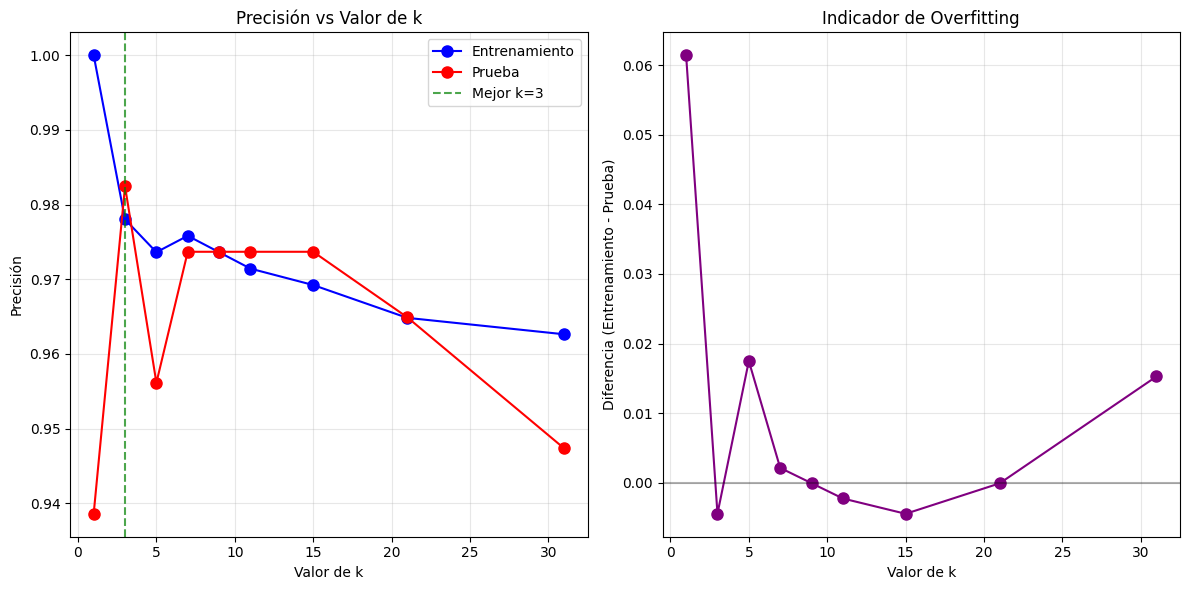


📊 Interpretación del gráfico:
   🔵 Línea azul: Precisión en entrenamiento
   🔴 Línea roja: Precisión en prueba
   🟢 Línea verde: Mejor valor de k
   🟣 Gráfico derecho: Diferencia indica overfitting


In [18]:
# Probar diferentes valores de k
k_values = [1, 3, 5, 7, 9, 11, 15, 21, 31]
train_accuracies = []
test_accuracies = []

print("🔄 Probando diferentes valores de k...")
for k in k_values:
    # Entrenar KNN con k vecinos
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Calcular precisión en entrenamiento y prueba
    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"   k={k:2d}: Entrenamiento={train_acc:.4f}, Prueba={test_acc:.4f}")

# Encontrar el mejor k
best_k_idx = np.argmax(test_accuracies)
best_k = k_values[best_k_idx]
best_accuracy = test_accuracies[best_k_idx]

print(f"\n🏆 Mejor k: {best_k} (Precisión: {best_accuracy:.4f})")

# Visualización del efecto de k
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, train_accuracies, 'o-', label='Entrenamiento', color='blue', markersize=8)
plt.plot(k_values, test_accuracies, 'o-', label='Prueba', color='red', markersize=8)
plt.axvline(x=best_k, color='green', linestyle='--', alpha=0.7, label=f'Mejor k={best_k}')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Precisión vs Valor de k')
plt.legend()
plt.grid(True, alpha=0.3)

# Análisis bias-variance
plt.subplot(1, 2, 2)
variance_proxy = np.array(train_accuracies) - np.array(test_accuracies)
plt.plot(k_values, variance_proxy, 'o-', color='purple', markersize=8)
plt.xlabel('Valor de k')
plt.ylabel('Diferencia (Entrenamiento - Prueba)')
plt.title('Indicador de Overfitting')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretación del gráfico:")
print("   🔵 Línea azul: Precisión en entrenamiento")
print("   🔴 Línea roja: Precisión en prueba")
print("   🟢 Línea verde: Mejor valor de k")
print("   🟣 Gráfico derecho: Diferencia indica overfitting")

# 4.  EVALUACIÓN DETALLADA DEL MEJOR MODELO

🎯 Modelo final: KNN con k=3
📊 Precisión: 0.9825

📈 Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        42
      benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


📊 Matriz de Confusión:
[[40  2]
 [ 0 72]]


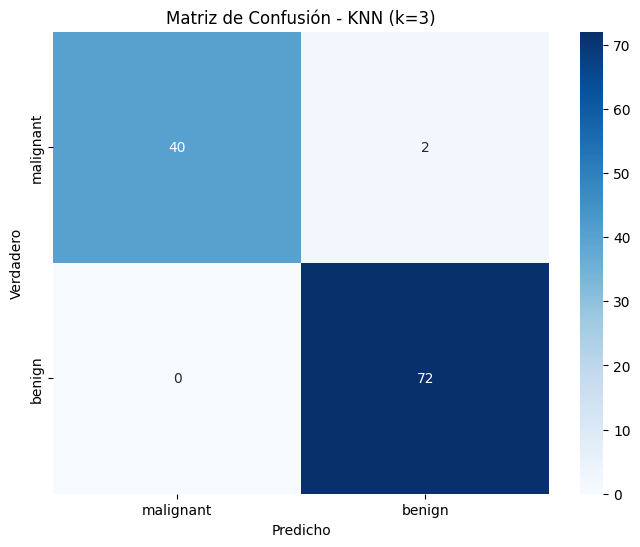


⚠️ Análisis de errores:
   🔴 Falsos Positivos: 2 (benignos → malignos)
   🔴 Falsos Negativos: 0 (malignos → benignos)
   💡 En medicina, minimizar FN es más crítico!


In [19]:
# Entrenar modelo final con el mejor k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# Predicciones
y_pred = knn_final.predict(X_test_scaled)

# Métricas detalladas
print(f"🎯 Modelo final: KNN con k={best_k}")
print(f"📊 Precisión: {accuracy_score(y_test, y_pred):.4f}")

print("\n📈 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Matriz de Confusión:")
print(cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.title(f'Matriz de Confusión - KNN (k={best_k})')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

# Análisis de errores
false_positives = cm[0, 1]  # Benignos clasificados como malignos
false_negatives = cm[1, 0]  # Malignos clasificados como benignos

print(f"\n⚠️ Análisis de errores:")
print(f"   🔴 Falsos Positivos: {false_positives} (benignos → malignos)")
print(f"   🔴 Falsos Negativos: {false_negatives} (malignos → benignos)")
print(f"   💡 En medicina, minimizar FN es más crítico!")

# 5.  ANÁLISIS DE CARACTERÍSTICAS IMPORTANTES

🏆 Top 10 características más importantes (por correlación):
    1. worst concave points      (corr: 0.794)
    2. worst perimeter           (corr: 0.783)
    3. mean concave points       (corr: 0.777)
    4. worst radius              (corr: 0.776)
    5. mean perimeter            (corr: 0.743)
    6. worst area                (corr: 0.734)
    7. mean radius               (corr: 0.730)
    8. mean area                 (corr: 0.709)
    9. mean concavity            (corr: 0.696)
   10. worst concavity           (corr: 0.660)


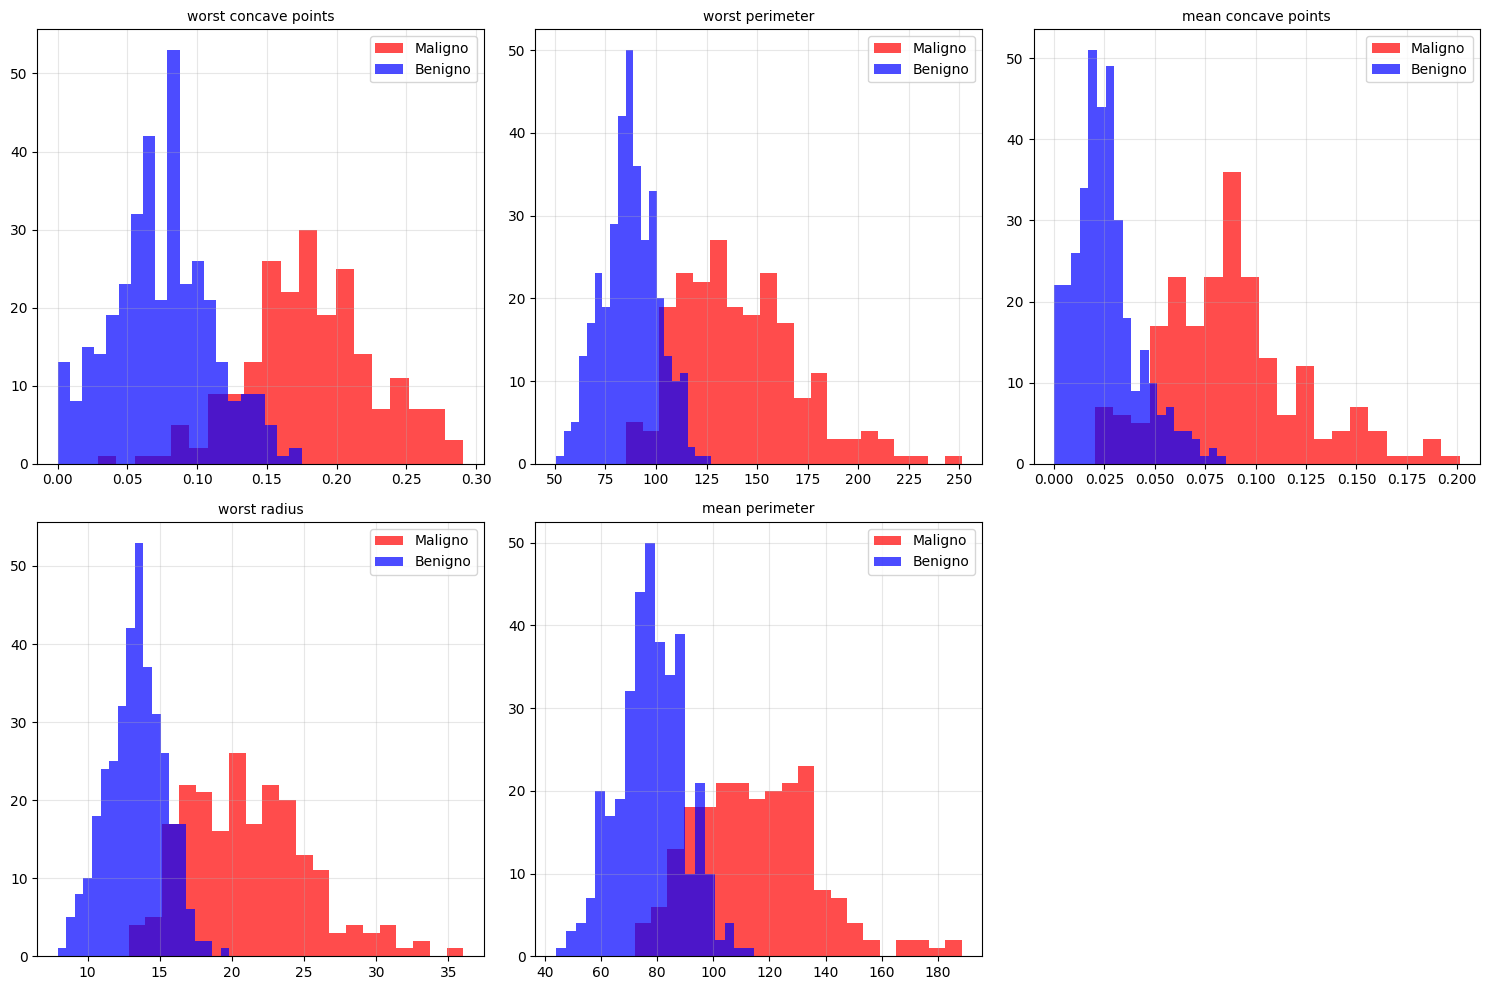

In [20]:
# Para KNN, analizamos la importancia mediante correlación con el target
feature_importance = []
for i, feature in enumerate(cancer.feature_names):
    correlation = np.abs(np.corrcoef(X[:, i], y)[0, 1])
    feature_importance.append((feature, correlation))

# Ordenar por importancia
feature_importance.sort(key=lambda x: x[1], reverse=True)

print("🏆 Top 10 características más importantes (por correlación):")
for i, (feature, correlation) in enumerate(feature_importance[:10]):
    print(f"   {i+1:2d}. {feature:<25} (corr: {correlation:.3f})")

# Visualización de las top 5 características
top_5_features = [f[0] for f in feature_importance[:5]]
top_5_indices = [list(cancer.feature_names).index(f) for f in top_5_features]

plt.figure(figsize=(15, 10))
for i, (feature_idx, feature_name) in enumerate(zip(top_5_indices, top_5_features)):
    plt.subplot(2, 3, i+1)
    
    # Separar por clase
    malignos = X[y == 0, feature_idx]
    benignos = X[y == 1, feature_idx]
    
    plt.hist(malignos, alpha=0.7, label='Maligno', bins=20, color='red')
    plt.hist(benignos, alpha=0.7, label='Benigno', bins=20, color='blue')
    plt.title(feature_name, fontsize=10)
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. COMPARACIÓN DE MÉTRICAS DE DISTANCIA

In [21]:
# Probar diferentes métricas de distancia
metricas = ['euclidean', 'manhattan', 'chebyshev']
resultados_metricas = {}

print("🔄 Probando diferentes métricas de distancia...")
for metrica in metricas:
    knn_metrica = KNeighborsClassifier(n_neighbors=best_k, metric=metrica)
    knn_metrica.fit(X_train_scaled, y_train)
    accuracy = knn_metrica.score(X_test_scaled, y_test)
    resultados_metricas[metrica] = accuracy
    print(f"   📊 {metrica.capitalize():<12}: {accuracy:.4f}")

# Mejor métrica
mejor_metrica = max(resultados_metricas, key=resultados_metricas.get)
print(f"\n🏆 Mejor métrica: {mejor_metrica} ({resultados_metricas[mejor_metrica]:.4f})")

🔄 Probando diferentes métricas de distancia...
   📊 Euclidean   : 0.9825
   📊 Manhattan   : 0.9649
   📊 Chebyshev   : 0.9386

🏆 Mejor métrica: euclidean (0.9825)


# 6. PREDICCIÓN EN NUEVOS CASOS

In [22]:
# Simular nuevos casos para diagnóstico
print("🏥 Simulando diagnóstico de nuevos casos...")

# Tomar algunos casos del conjunto de prueba como "nuevos"
nuevos_casos = X_test_scaled[:3]
casos_reales = y_test[:3]

for i, (nuevo_caso, clase_real) in enumerate(zip(nuevos_casos, casos_reales)):
    # Predicción
    prediccion = knn_final.predict([nuevo_caso])[0]
    probabilidades = knn_final.predict_proba([nuevo_caso])[0]
    
    # Encontrar vecinos más cercanos
    distancias, indices = knn_final.kneighbors([nuevo_caso])
    vecinos_clases = y_train[indices[0]]
    
    clase_pred_nombre = cancer.target_names[prediccion]
    clase_real_nombre = cancer.target_names[clase_real]
    
    print(f"\n👤 Caso {i+1}:")
    print(f"   🎯 Predicción: {clase_pred_nombre}")
    print(f"   ✅ Real: {clase_real_nombre}")
    print(f"   📊 Probabilidades: Maligno={probabilidades[0]:.3f}, Benigno={probabilidades[1]:.3f}")
    print(f"   👥 Vecinos más cercanos: {vecinos_clases}")
    print(f"   {'✅ CORRECTO' if prediccion == clase_real else '❌ INCORRECTO'}")

🏥 Simulando diagnóstico de nuevos casos...

👤 Caso 1:
   🎯 Predicción: malignant
   ✅ Real: malignant
   📊 Probabilidades: Maligno=1.000, Benigno=0.000
   👥 Vecinos más cercanos: [0 0 0]
   ✅ CORRECTO

👤 Caso 2:
   🎯 Predicción: benign
   ✅ Real: benign
   📊 Probabilidades: Maligno=0.000, Benigno=1.000
   👥 Vecinos más cercanos: [1 1 1]
   ✅ CORRECTO

👤 Caso 3:
   🎯 Predicción: malignant
   ✅ Real: malignant
   📊 Probabilidades: Maligno=1.000, Benigno=0.000
   👥 Vecinos más cercanos: [0 0 0]
   ✅ CORRECTO


# 🔜 PRÓXIMA SESIÓN: Support Vector Machines (SVM)
+ 📚 Aprenderemos sobre hiperplanos y kernel trick
+ 🧮 Veremos cómo SVM maneja fronteras no lineales